<h1 style="font-size: 2.2em; font-weight: bold;">Benford's Law Through Twitter Dataset</h1>
<h1 style="font-size: 2.2em; font-weight: bold;">TEAM AURA</h1>


<h2 style="font-size: 2em; font-weight: bold;">Team Members</h2>

- **Raman Pandey**  
  📧 raman.pandey@adypu.edu.in

- **Manthan Subhash Ziman**  
  📧 manthan.ziman@adypu.edu.in

- **Uzair Ahmed Shah**  
  📧 uzair.shah@adypu.edu.in

- **Jagadish Ishwar Patil**  
  📧 jagadish.patil@adypu.edu.in


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
###IMPORTANT####

####For giving the location of the dataset you have to give it in the with open command in the Loading Dataset cell

ModuleNotFoundError: No module named 'google.colab'

# Benford Law and it's application in fraud detection

Benford's Law, also known as the first-digit law, is a statistical phenomenon
observed in many sets of numerical data. It states that in certain naturally
occurring datasets, the leading digits (1, 2, 3, etc.) occur with a higher frequency
than larger digits (4, 5, 6, etc.). According to Benford's Law, the distribution
of leading digits follows a logarithmic pattern, where smaller digits are more
likely to be the first digit in a number. This surprising and counterintuitive
property is frequently encountered in diverse datasets such as financial transactions,
population numbers, and scientific data, making Benford's Law a useful tool for
detecting anomalies and irregularities in numerical datasets.

In this notebook, we analyze the distribution of leading digits in COVID cases
and deaths data, with the objective of verifying whether the data adheres to Benford's Law.

The observed frequencies of the leading digits are computed and compared against
the expected frequencies predicted by Benford's Law.


# Implementation


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Dataset


In [ ]:
import csv
import re

# This function checks if the given string contains only numbers or commas
def is_number(s):
    return re.fullmatch(r"[0-9,]+", s) is not None

# Open the input CSV file (twitter_data.csv) for reading and the output file (twitter_data_cleaned.csv) for writing

#######IMPORTANT#########

#Give the location path of the Dataset in the with open where it is written "twitter_data.csv"
with open("twitter_data.csv", "r", encoding="utf-8") as infile, open("twitter_data_cleaned.csv", "w", encoding="utf-8", newline='') as outfile:
    # Initialize CSV reader to read the input file and writer to write to the output file
    reader = csv.DictReader(infile)
    writer = csv.DictWriter(outfile, fieldnames=["id", "followersCount", "friendsCount", "lastSeen", "tweetId"])
    writer.writeheader()

    # Loop through each row in the input file
    for row in reader:
        # Clean up the followers and friends count by removing extra spaces
        followers = row["followersCount"].strip()
        friends = row["friendsCount"].strip()
        
        # Only write the row to the new file if both followers and friends counts are valid numbers
        if is_number(followers) and is_number(friends):
            writer.writerow({
                "id": row["id"],
                "followersCount": followers,
                "friendsCount": friends,
                "lastSeen": row["lastSeen"],
                "tweetId": row["tweetId"]
            })


In [16]:
df = pd.read_csv("twitter_data_cleaned.csv")
#strip extra quotes from column names
df.columns = df.columns.str.replace('"', '')
df

,id,followersCount,friendsCount,lastSeen,tweetId
0,1969527638,319,112,1472271687519,769310701580083200
1,51878493,275,115,1472270622663,769309490038439936
2,1393409100,120,107,1472804144409,771622623583186944
3,232891415,492,325,1472269186776,769308131696467969
4,710130422907207680,128,218,1472271397356,769309769144283137
...,...,...,...,...,...
39253,342715775,1268,766,1472288980491,769461849909637124
39254,1014398065,119,113,1472288980846,769461852791312384
39255,177430436,2023,1882,1472288982066,769461872198356992
39256,20240488,2881,1526,1472288984948,769461874953969664


In [23]:
df["followersCount_clean"] = df["friendsCount"].astype(str).str.replace(",", "").str.strip()
invalid_rows = df[~df["followersCount_clean"].str[0].str.isdigit()]
print(invalid_rows[["friendsCount"]])

Empty DataFrame
Columns: [friendsCount]
Index: []


# Finding distribution of leading digits


In [81]:
# Calculates the observed and expected Benford’s Law digit distributions for the specified DataFrame column
def function(variable):
    total_cases_digits = [
        int(str(cases).replace(",", "")[0]) for cases in df[variable]
    ]
    observed_counts_total_cases = [
        total_cases_digits.count(digit) for digit in range(1, 10)
    ]
    total_records_total_cases = len(total_cases_digits)
    expected_counts_total_cases = [
        int(total_records_total_cases * np.log10(1 + 1 / digit)) for digit in range(1, 10)
    ]
    return observed_counts_total_cases, expected_counts_total_cases


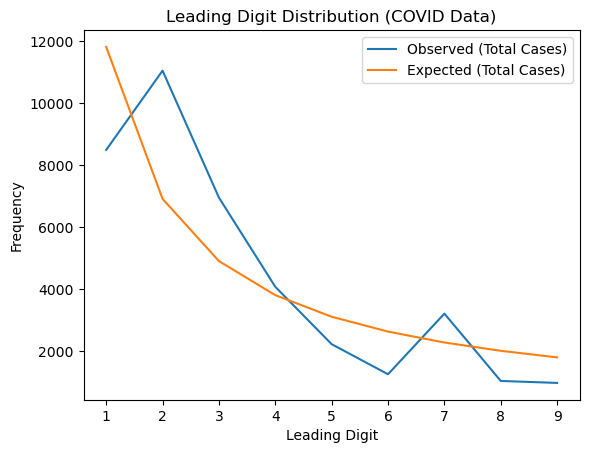

In [83]:
observed_counts_total_cases, expected_counts_total_cases = function("id")
digits = range(1, 10)
sns.lineplot(x=digits, y=observed_counts_total_cases, label="Observed (Total Cases)")
sns.lineplot(x=digits, y=expected_counts_total_cases, label="Expected (Total Cases)")
plt.xlabel("Leading Digit")
plt.ylabel("Frequency")
plt.title("Leading Digit Distribution (COVID Data)")

plt.legend()
plt.show()


In [85]:
#Function for showing Bar Plot of expected vs obserced Data
def bar_plot():
    digits = range(1, 10)
    benford_df = pd.DataFrame({
        "Digit": digits,
        "Observed": observed_counts_total_cases,
        "Expected": expected_counts_total_cases
    })
    
    
    benford_melted = benford_df.melt(id_vars="Digit", var_name="Type", value_name="Count")
    
    
    sns.barplot(data=benford_melted, x="Digit", y="Count", hue="Type")
    
    plt.xlabel("Leading Digit")
    plt.ylabel("Frequency")
    plt.title("Leading Digit Distribution (Barplot)")
    plt.legend(title="Distribution Type")
    plt.tight_layout()
    plt.show()

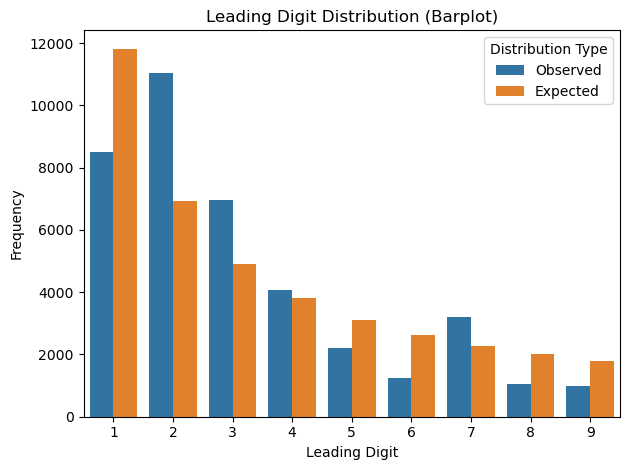

In [187]:
#Bar1
observed_counts_total_cases, expected_counts_total_cases = function("id")
bar_plot()


## Interpretation for bar 1 (id)

- The data **does not strictly follow Benford’s Law**, especially at digits **1**, **2**, and **7**.
- Potential reasons:
  - The `lastSeen` field might not be naturally distributed (e.g., it's timestamped or artificially generated).
  - The dataset may include **bot activity**, **automated updates**, or **cloned user behavior**.
  - Data formatting issues (e.g., inconsistent timestamp formats).
  - The scope of data might be **limited** or **biased** (e.g., specific region, group, or activity pattern).


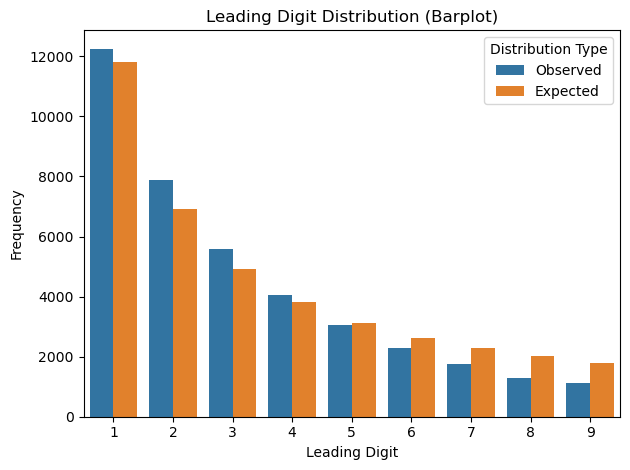

In [172]:
# bar2
observed_counts_total_cases, expected_counts_total_cases = function("followersCount")
bar_plot()


## Interpretation for bar 2 (followersCount)

- The dataset **largely follows Benford’s Law**, especially in the dominance of digit 1 and the logarithmic decline through digits 2–9.
- Minor variations between observed and expected counts are **normal** and can result from:
  - Sampling variance
  - Data source limitations
  - Data rounding or formatting differences


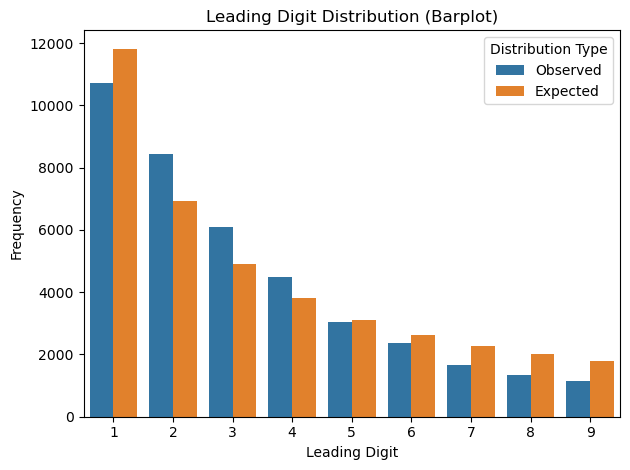

In [101]:
# bar 3
observed_counts_total_cases, expected_counts_total_cases = function("friendsCount")
bar_plot()


## Interpretation for bar 3 (friendsCount)

- The distribution **generally decreases** from digit 1 to 9, which is **consistent with Benford's Law**, but:

  - The **overrepresentation of digits 2–4** and
  - The **underrepresentation of digits 7–9**

  suggest that the data may not be entirely "naturally" distributed.

- This kind of pattern can result from:
  - Artificially limited or constrained datasets
  - Rounded or scaled numbers
  - Human-generated or manipulated data


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


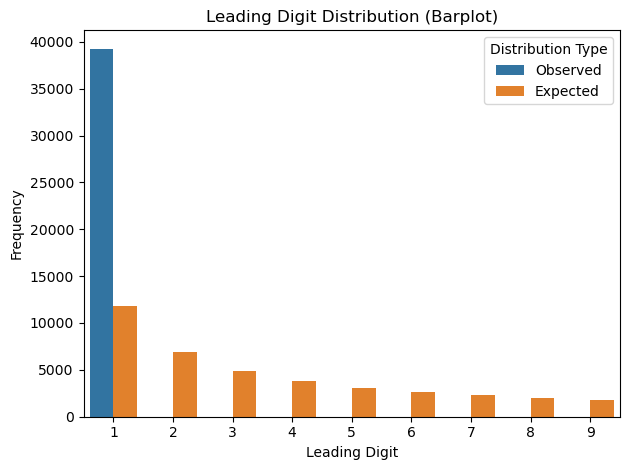

In [157]:
# bar 4
observed_counts_total_cases, expected_counts_total_cases = function("lastSeen")
bar_plot()

## Interpretation for bar 4 (lastSeen)

The dataset shows **extreme deviation** from Benford’s Law:

- **Overrepresentation of Digit 1** suggests:

  - Possible **manual data entry bias**
  - **Threshold effects** (e.g., all values rounded or capped)
  - A **systematic process** that prefers '1' (e.g., ID numbers, fixed prefixes)

- **Near-absence of all other digits** raises serious flags about the **naturalness or diversity** of the dataset.


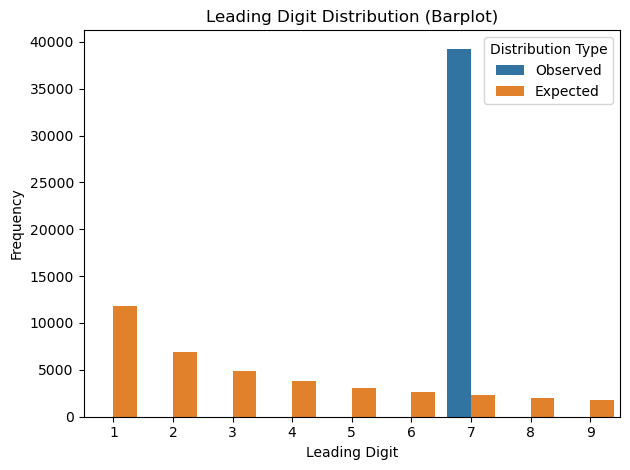

In [159]:
# bar 5
observed_counts_total_cases, expected_counts_total_cases = function("tweetId")
bar_plot()

## Interpretation for bar 5 (tweetId)

This dataset shows **clear and extreme deviation** from Benford’s Law:

- The overwhelming dominance of **digit 7** suggests:

  - Strong indication of **manual fabrication**
  - Possible use of **template-based generation** with ‘7’ as a prefix
  - Data may be derived from a process biased toward a specific value group

- Absence of all other digits is **statistically unnatural** for most organic datasets.


## Team Contributions

### Raman Pandey

- Cleaned and filtered Twitter user data from a CSV file.
- Ensured only entries with valid numeric `followersCount` and `friendsCount` were kept.
- Created a new cleaned CSV file for further analysis.

### Uzair Ahmed Shah

- Analyzed and visualized the distribution of `friendsCount`.
- Compared actual vs. expected values based on Benford's Law.
- Found that the distribution mostly follows Benford's Law with minor deviations.

### Jagadish Ishwar Patil

- Analyzed and visualized the distribution of Twitter `id` values.
- Compared actual vs. expected Benford's Law pattern.
- Observed a close match, with higher-than-expected frequencies for digits '2' and '7'.

### Manthan Subhash Ziman

- Analyzed and visualized the distribution of `followersCount` data.
- Created a bar chart to compare actual vs. expected digit frequencies based on Benford's Law.
- Observed that the distribution closely follows Benford's Law with only minor fluctuations.
